Let $\mathbf{y}$ be a $n \times 1$ real response vector, and let $X$
be a $n \times p$ real matrix of $n$ samples and $p$ predictors. Let $\boldsymbol{\beta}$ be a  $p \times 1$ real coefficient vector. Let $\boldsymbol{\epsilon}$ be a $n \times 1$ real response noise vector.

Assume model is:
\begin{equation}
    \mathbf{y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon}, 
\end{equation}


We estimate the beta in our linear regression model based off of:

\begin{equation}
\boldsymbol{\beta} = (X^T X)^{-1} X^T y.
\end{equation}

In [94]:
# Let's simulate some data appropriate to a homoscedastic and heteroscedastic 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def perform_linear_regression(n, p, beta, sigma, bounds,
                             title='Linear Regression', hetero=False):

    x = None
    for lower_bound, upper_bound in bounds:
        xc = np.arange(lower_bound, upper_bound)
        xc = np.repeat(xc, n*1.0/xc.shape[0])
        if xc.shape[0] != n:
            missing = n - xc.shape[0]
            xc = np.concatenate((xc, xc[:missing]))
        
        xd = np.reshape(xc, (xc.shape[0], 1))
        if x == None:
            x = np.copy(xd)
        else:
            x = np.concatenate((x, xd), axis=1)
    print "Shape is ", x.shape, " and n x p is", n, p

    if not hetero:
        epsilon = np.random.normal(scale = sigma, size=(n,1))
    else:
        epsilon = np.random.normal(scale = sigma/x, size=(n,1))
        

    # Set y
    y = x * beta + epsilon

    print x.T.shape, x.shape, np.dot(x.T, x).shape

    # Obtain our estimate of beta
    beta_est = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
    y_est = beta_est * x


    # Plot lin reg

    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, y_est, 'b-', linewidth = 1.5, label='y_pred')
    plt.legend()
    plt.title(title, fontsize=20)
    plt.show()
    
    # plot residuals
    plt.figure()
    plt.scatter(y_est, y - y_est)
    plt.plot(y_est, np.zeros(y.shape), 'b-', label='y_pred')
    plt.legend()
    plt.title("Residuals", fontsize=20)
    plt.show()


    print "Estimated beta", beta_est, "from beta = ", beta
    print "Correlation ", np.corrcoef(np.reshape(y_est, (1, n)), np.reshape(y, (1,n)))
    print "Covariance ", np.cov(np.reshape(y_est, (1, n)), np.reshape(y, (1,n)))



Shape is  (300, 1)  and n x p is 300 1
(1, 300) (300, 1) (1, 1)


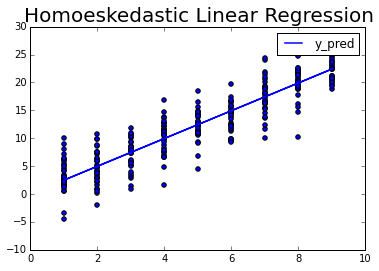

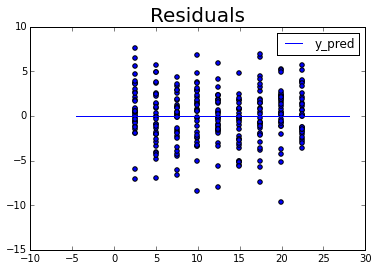

Estimated beta [[ 2.48693906]] from beta =  2.5
Correlation  [[ 1.          0.91008113]
 [ 0.91008113  1.        ]]
Covariance  [[ 41.93959624  41.65245649]
 [ 41.65245649  49.94554731]]


In [75]:
#univariate parameters
n = 300
p = 1
beta = 2.5
sigma = 3
bounds = [(1, 10)]

perform_linear_regression(n, p, beta, sigma, bounds, title="Homoeskedastic Linear Regression")

Now let's look into heteroskedastic linear regression.

Let $\mathbf{y}$ be a $n \times 1$ real response vector, and let $X$
be a $n \times p$ real matrix of $n$ samples and $p$ predictors. Let $\boldsymbol{\beta}$ be a  $p \times 1$ real coefficient vector. Let $\boldsymbol{\epsilon}$ be a $n \times 1$ real response noise vector.

As before, assume model is:
\begin{equation}
    \mathbf{y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon}
\end{equation}

Here, $\epsilon_i \sim N(0, \frac{\sigma^2}{w_i})$ where $w_i$ is a "weight", a constant that depends on sample $i$.


Define $\mathbf{y^{*}} = \mathbf{W^{1/2}} \mathbf{y}$, $\mathbf{X^*} = \mathbf{W^{1/2}} \mathbf{y}$ where $\mathbf{W^{1/2}}$ is a positive $n \times n$ diagonal matrix with $W^{1/2}_{ii} = w^{1/2}_i$.

Then,

\begin{equation}
    \boldsymbol{\beta}_w = ((X^*)^T (X^*))^{-1} (X^*)^T Y^*.
    = (X^T W X)^{-1} X^T W Y
\end{equation}



In [98]:
#Univariate case

def getWeight(x):
    return x

def perform_hetero_linear_regression(n, p, beta, sigma,lower_bound, upper_bound,
                             title='Heteroskedastic Linear Regression'):
    xc = np.arange(lower_bound, upper_bound)

    x = None

    xc = np.repeat(xc, n*1.0/xc.shape[0])

    if xc.shape[0] != n:
        missing = n - xc.shape[0]
        xc = np.concatenate((xc, xc[:missing]))

    x = np.reshape(xc, (xc.shape[0], 1))
    weights = getWeight(x)
    
    # Set epislons
    epsilon = np.zeros(weights.shape)
    for i in range(len(x)):
        epsilon[i] = np.random.normal(scale = sigma/weights[i])

    # Set y
    y = x * beta + epsilon

    
    W = np.diag(weights.flatten())
    print W.shape
    # Obtain our estimate of beta
    beta_est = np.dot(np.linalg.inv(np.dot(np.dot(x.T, W), x)), np.dot(np.dot(x.T, W), y))
    y_est = beta_est * x


    # Plot lin reg

    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, y_est, 'b-', linewidth = 1.5, label='y_pred')
    plt.legend(loc = 4)
    plt.title(title, fontsize=20)
    plt.show()

    # plot residuals
    plt.figure()
    plt.scatter(y_est, y - y_est)
    plt.plot(y_est, np.zeros(y.shape), 'b-', label='y_pred')
    plt.legend(loc = 4)
    plt.title("Residuals", fontsize=20)
    plt.show()
    
    print "Estimated beta", beta_est, "from beta = ", beta
    print "Correlation ", np.corrcoef(np.reshape(y_est, (1, n)), np.reshape(y, (1,n)))
    print "Covariance ", np.cov(np.reshape(y_est, (1, n)), np.reshape(y, (1,n)))


(300, 300)


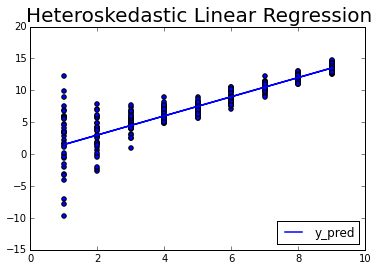

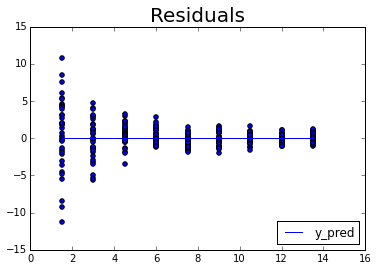

Estimated beta [[ 1.50152565]] from beta =  1.5
Correlation  [[ 1.          0.87316514]
 [ 0.87316514  1.        ]]
Covariance  [[ 15.28830957  14.62843037]
 [ 14.62843037  18.35875457]]


In [99]:
n = 300
p = 1
beta = 1.5
lower_bound = 1
upper_bound = 10
sigma = 5.0

perform_hetero_linear_regression(n, p, beta, sigma,lower_bound, upper_bound)